# Build K-means algorithm from Scratch

In [14]:
import pandas as pd
import numpy as np

In [32]:
players = pd.read_csv("dataset/players_22.csv")

C:\Users\PC\AppData\Local\Temp\ipykernel_9544\3412631191.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("dataset/players_22.csv")


In [34]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [66]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [68]:
players = players.dropna(subset=features)

In [75]:
#Take a copy of dataframe to prevent bad effect on raw_df
data = players[features].copy()

In [77]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Steps

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [80]:
#You can use MinMaxCaler() from sklearn
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [82]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [84]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [93]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [95]:
centroids = random_centroids(data, 5)

C:\Users\PC\AppData\Local\Temp\ipykernel_9544\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [97]:
centroids

,0,1,2,3,4
overall,4.260870,7.304348,1.869565,5.347826,5.130435
potential,5.565217,4.478261,6.000000,5.347826,4.043478
wage_eur,1.014306,1.414878,1.014306,1.243205,1.214592
value_eur,1.034331,1.035620,1.029177,1.004691,1.071704
age,3.592593,6.185185,2.481481,5.074074,1.740741


In [107]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [109]:
labels = get_labels(data, centroids)

In [111]:
labels.value_counts()

3    7943
0    6794
1    2383
2    2021
4      24
Name: count, dtype: int64

In [115]:
# Calculate Geometric mean: Cluster centroid
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [117]:
from sklearn.decomposition import PCA #Principle Composition Analysis to visual data which has more than 2 dimension
import matplotlib.pyplot as plt
from IPython.display import clear_output #Interation Python will display iterations

In [127]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)# 2 columns return 
    
    data_2d = pca.fit_transform(data) #fit to the data
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)

    #plott the graph
    plt.title(f'No_intertions {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) # plot datapoints
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) # plot centroids
    plt.show()

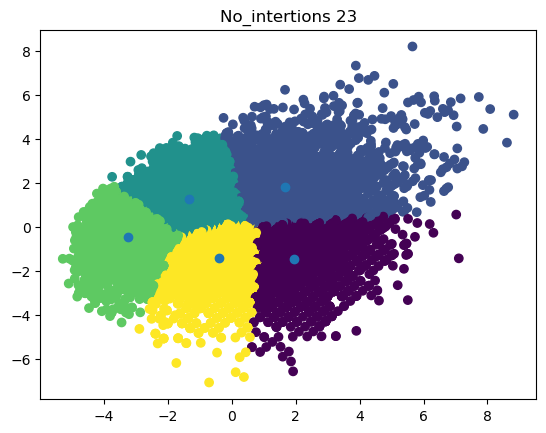

In [131]:
max_iterations = 100
centroid_count = 5

#initialize random centroids
centroids = random_centroids(data, centroid_count)


#Strop when centroids is same to our previous centroid that we were set before
old_centroids = pd.DataFrame()  
iteration = 1


#Run a loop
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids) #label c
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [133]:
centroids

,0,1,2,3,4
overall,5.757707,6.978863,4.608313,2.634449,4.487968
potential,5.335363,7.306968,6.472131,4.756480,4.491148
wage_eur,1.193210,1.695604,1.076828,1.017265,1.058325
value_eur,1.064944,1.454407,1.067999,1.014507,1.034333
age,6.702753,4.386724,2.752475,2.446208,4.855135


# Each centroid have difference which resprent for group of player

eg. Group 1 is supter star players, which in their prime

In [22]:
labels.value_counts()

2    7188
0    6162
1    5815
dtype: int64

In [148]:
#Show players name
players[labels == 1][["short_name"] + features] 

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
7085,G. Guruceaga,68,73,500.0,1400000.0,26
7116,E. Zaldívar,68,77,5000.0,2500000.0,24
7319,Sori Mané,68,75,5000.0,2200000.0,25
7329,N. Šipčić,68,73,4000.0,1600000.0,26


In [150]:
#Using KMeans form sklearn framework

from sklearn.cluster import KMeans

In [162]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [164]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.781493,3.863069,5.235908
potential,7.239041,5.657035,4.906205
wage_eur,1.718608,1.043216,1.127235
value_eur,1.453937,1.038818,1.045108
age,4.446042,2.895768,6.124745


In [166]:
centroids

,0,1,2,3,4
overall,5.757707,6.978863,4.608313,2.634449,4.487968
potential,5.335363,7.306968,6.472131,4.756480,4.491148
wage_eur,1.193210,1.695604,1.076828,1.017265,1.058325
value_eur,1.064944,1.454407,1.067999,1.014507,1.034333
age,6.702753,4.386724,2.752475,2.446208,4.855135
